In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.io as pio

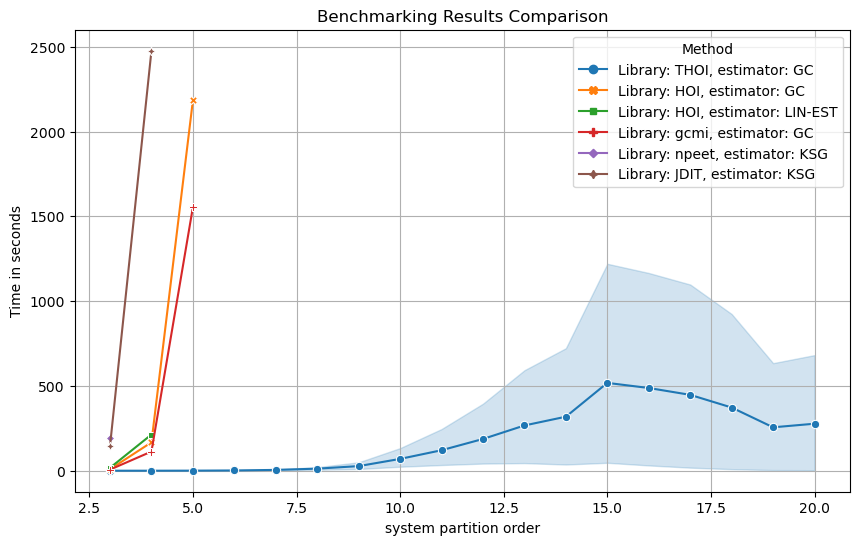

In [4]:
# Define the file paths
file_paths = [
    "new_library-thoi_estimator-gc.tsv",
    "library-hoi_estimator-gc.tsv",
    "library-hoi_estimator-linest.tsv",
    "library-gcmi_estimator-gc.tsv",
    "library-npeet_estimator-ksg.tsv",
    "library-jdit_estimator-ksg.tsv"
]

# Read each file into a DataFrame and assign a 'Method' column
dataframes = []
for path in file_paths:
    df = pd.read_csv(os.path.join('../benchmarking/results/times/',path), sep="\t")
    dataframes.append(df)

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df['library-estimator'] = 'Library: ' + combined_df['library'] + ', estimator: ' + combined_df['estimator']

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=combined_df, x="order", y="time",
    hue="library-estimator", style='library-estimator',
    markers=True, dashes=False
)

plt.title('Benchmarking Results Comparison')
plt.xlabel('system partition order')
plt.ylabel('Time in seconds')
plt.legend(title='Method')
plt.grid(True)

plt.savefig('./figures/times/benchmarking.svg', format='svg')
plt.show()

In [5]:
df = pd.read_csv('../benchmarking/results/times/new_library-thoi_estimator-gc.tsv', sep='\t')
df = df[['T', 'N', 'batch_size', 'order', 'time']]

# Create the list of dimensions with correct ranges
dimensions = []
for column in df.columns:
    if column != 'time':
        dimensions.append(
            dict(
                range=[df[column].min(), df[column].max()],
                label=column, values=df[column]
            )
        )

# Create the parallel coordinate plot
fig = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df['time'],
            colorscale='Solar',
            showscale=True,
            cmin=df['time'].min(),
            cmax=df['time'].max()
        ),
        dimensions=dimensions
    )
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

pio.write_image(fig, './figures/times/parameters_evaluation.svg', format='svg')